# Chapter2 そもそもモンテカルロ法とは

In [21]:
import random
import numpy as np
import matplotlib.pyplot as plt

### 2.2.1 一様乱数を用いた円周率の計算

In [33]:
def calc_2_2_1():
  niter = 1000
  n_in = 0
  xs_in =[]
  ys_in =[]
  xs_out =[]
  ys_out =[]
  areas = []

  for i in range(niter):
    x = random.uniform(0, 1)
    y = random.uniform(0, 1)

    if (x**2 + y**2) < 1.0:
      n_in = n_in + 1
      xs_in.append(x)
      ys_in.append(y)

      areas.append(n_in / (i + 1))
    else:
      xs_out.append(x)
      ys_out.append(y)
  
  return n_in/niter, xs_in, ys_in, xs_out, ys_out, areas

result, xs_in, ys_in, xs_out, ys_out, areas = calc_2_2_1()

print('算出した値: ', result)
print('正解: ', np.pi / 4)

算出した値:  0.7853981633974483
正解:  0.789


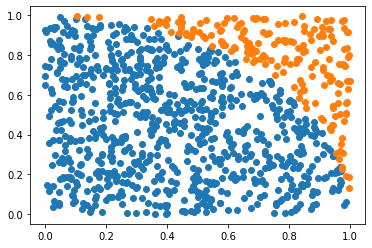

In [27]:
plt.scatter(xs_in, ys_in)
plt.scatter(xs_out, ys_out)

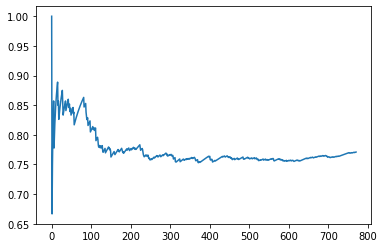

In [31]:
plt.plot(range(len(areas)), areas)

### 2.2.2 一様乱数を用いた定積分

#### 期待値からのとらえかた(p.28 期待値と積分を参照): 
- 積分の定義: f(x) * P(x)をa-bで積分したもの
- f(x): 評価したい値(y), P(x): yが発生する確率
- この例題では、P(x) = 1 / (1-0) = 1: 一様分布と仮定している
- a-b区間でランダムに発生させた乱数をf(x)に利用した平均値を使うことで、期待値と一致する
- モンテカルロ法を利用することでf(x)(高さ)から面積を算出することができる

In [37]:
def calc_2_2_2():
  sum_y = 0
  areas = []
  n_iter = 1000

  for i in range(n_iter):
    x = random.random()
    y = np.sqrt(1 - x**2) # 扇形の微小xにおける面積(高さ): f(x) = √(1-x**2) 
    sum_y += y
    areas.append(y / (i + 1))

  return (sum_y/ n_iter), areas


result, areas = calc_2_2_2()
print('算出した値: ', result)
print('正解: ', np.pi / 4)

算出した値:  0.7794061282832477
正解:  0.7853981633974483


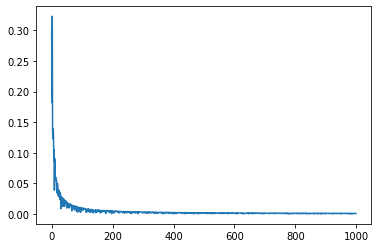

In [40]:
plt.plot(range(len(areas)), areas)